# Prediction of survival on the Titanic and get familiar with ML basics

In [56]:
# import EDA libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

# to print the graph on screen 

%matplotlib  inline 

# import the preprocessing libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV

# import libraries for models

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import VotingClassifier


## Load Data 

In [2]:
train_data = pd.read_csv('train.csv')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test_data = pd.read_csv('test.csv')
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
train_data.shape

(891, 12)

## Explore the pattern in the data 

In [5]:
# check if data is missing
missing = train_data.isna().sum()
print(missing[missing > 0])

Age         177
Cabin       687
Embarked      2
dtype: int64


In [6]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


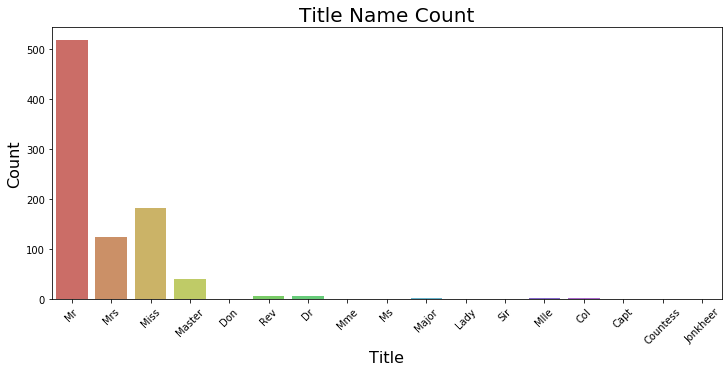

In [7]:
# lookin the prefix of the name

train_data['Title'] = train_data.Name.apply(lambda x: re.search(' ([A-Z][a-z]+)\.', x).group(1))

#defining the figure size of our graphic
plt.figure(figsize=(12,5))

#Plotting the result
sns.countplot(x='Title', data=train_data, palette="hls")
plt.xlabel("Title", fontsize=16) #seting the xtitle and size
plt.ylabel("Count", fontsize=16) # Seting the ytitle and size
plt.title("Title Name Count", fontsize=20) 
plt.xticks(rotation=45)
plt.show()

In [8]:
test_data['Title'] = test_data.Name.apply(lambda x: re.search(' ([A-Z][a-z]+)\.', x).group(1))

In [9]:
#Now, I will identify the social status of each title

Title_Dictionary = {
        "Capt":       "Officer",
        "Col":        "Officer",
        "Major":      "Officer",
        "Dr":         "Officer",
        "Rev":        "Officer",
        "Jonkheer":   "Royalty",
        "Don":        "Royalty",
        "Sir" :       "Royalty",
        "the Countess":"Royalty",
        "Dona":       "Royalty",
        "Lady" :      "Royalty",
        "Mme":        "Mrs",
        "Ms":         "Mrs",
        "Mrs" :       "Mrs",
        "Mlle":       "Miss",
        "Miss" :      "Miss",
        "Mr" :        "Mr",
        "Master" :    "Master"}

# we map each title to correct category
train_data['Title'] = train_data.Title.map(Title_Dictionary)
test_data['Title'] = test_data.Title.map(Title_Dictionary)

In [10]:
# printing chances to survive by titles 
print("chances to survive by titles")
print(train_data.groupby('Title')['Survived'].mean())

chances to survive by titles
Title
Master     0.575000
Miss       0.701087
Mr         0.156673
Mrs        0.795276
Officer    0.277778
Royalty    0.500000
Name: Survived, dtype: float64


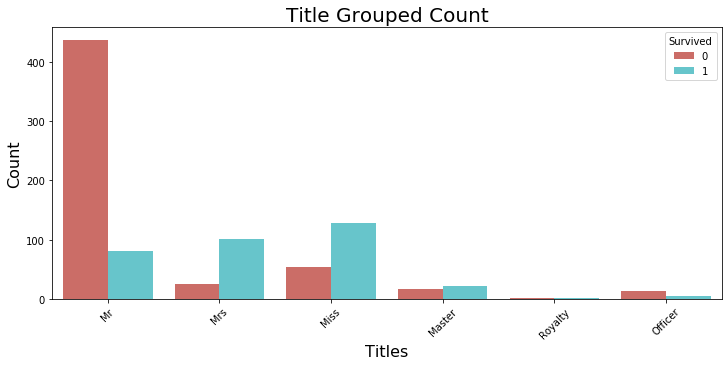

In [11]:
plt.figure(figsize= (12,5))

sns.countplot(x='Title', data=train_data, palette="hls",
              hue="Survived")
plt.xlabel("Titles", fontsize=16)
plt.ylabel("Count", fontsize=16)
plt.title("Title Grouped Count", fontsize=20)
plt.xticks(rotation=45)
plt.show()

In [12]:
#Let's group the median age by sex, pclass and title, to have any idea and maybe input in Age NAN's
age_group = train_data.groupby(["Sex","Pclass","Title"])["Age"]

#printing the variabe that we created by median
print(age_group.median())

Sex     Pclass  Title  
female  1       Miss       30.0
                Mrs        40.0
                Officer    49.0
                Royalty    48.0
        2       Miss       24.0
                Mrs        31.5
        3       Miss       18.0
                Mrs        31.0
male    1       Master      4.0
                Mr         40.0
                Officer    51.0
                Royalty    40.0
        2       Master      1.0
                Mr         31.0
                Officer    46.5
        3       Master      4.0
                Mr         26.0
Name: Age, dtype: float64


In [13]:
#inputing the values on Age Na's 
# using the groupby to transform this variables
train_data.loc[train_data.Age.isnull(), 'Age'] = train_data.groupby(['Sex','Pclass','Title']).Age.transform('median')

# printing the total of nulls in Age Feature
print(train_data["Age"].isna().sum())

0


C:\Users\Dell-PC\Desktop\ML_Projects\heart-disease_prediction\env\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 864x360 with 0 Axes>

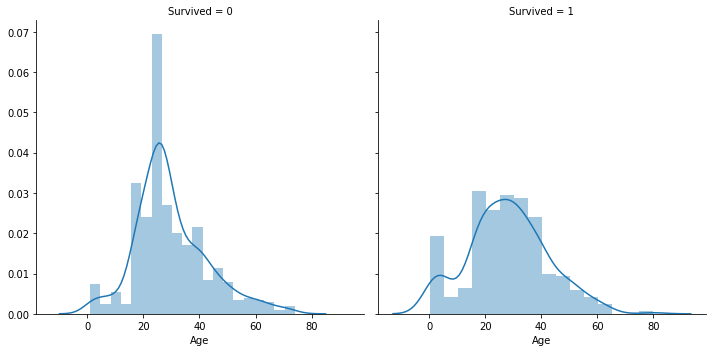

In [14]:
#separate by survivors or not

# figure size
plt.figure(figsize=(12,5))

# using facetgrid that is a great way to get information of our dataset
g = sns.FacetGrid(train_data, col='Survived',size=5)
g = g.map(sns.distplot, "Age")
plt.show()

In [15]:
#creating the intervals that we need to cut each range of ages
interval = (0, 5, 12, 18, 25, 35, 60, 120) 

#Seting the names that we want use to the categorys
cats = ['babies', 'Children', 'Teen', 'Student', 'Young', 'Adult', 'Senior']

# Applying the pd.cut and using the parameters that we created 
train_data["Age_cat"] = pd.cut(train_data.Age, interval, labels=cats)

# Printing the new Category
train_data["Age_cat"].head()

0    Student
1      Adult
2      Young
3      Young
4      Young
Name: Age_cat, dtype: category
Categories (7, object): [babies < Children < Teen < Student < Young < Adult < Senior]

In [16]:
interval = (0, 5, 12, 18, 25, 35, 60, 120)

#same as the other df train
cats = ['babies', 'Children', 'Teen', 'Student', 'Young', 'Adult', 'Senior']

# same that we used above in df train
test_data["Age_cat"] = pd.cut(test_data.Age, interval, labels=cats)

Survived    0   1
Age_cat          
babies     15  33
Children   16   9
Teen       54  49
Student   108  56
Young     206  99
Adult     133  91
Senior     17   5


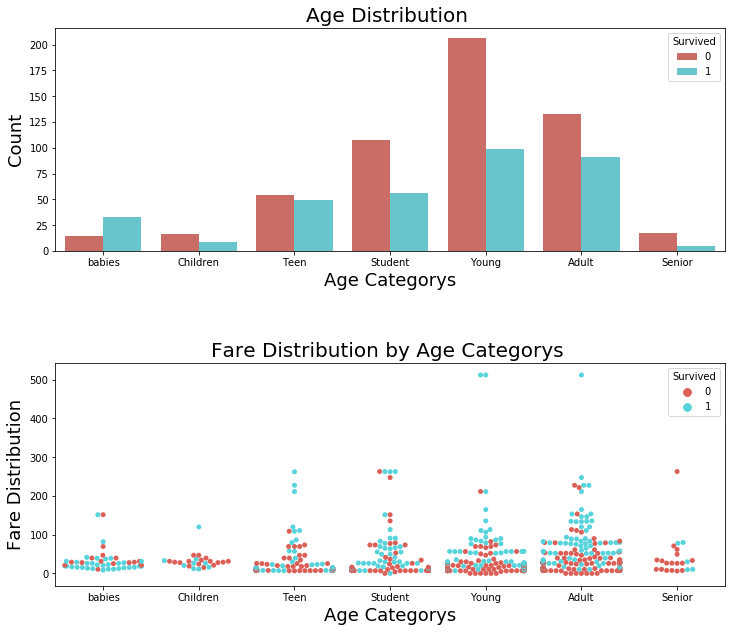

In [17]:
#Describe of categorical Age

# Using pd.crosstab to understand the Survived rate by Age Category's
print(pd.crosstab(train_data.Age_cat, train_data.Survived))

#Seting the figure size
plt.figure(figsize=(12,10))

#Plotting the result
plt.subplot(2,1,1)
sns.countplot("Age_cat",data=train_data,hue="Survived", palette="hls")
plt.ylabel("Count", fontsize=18)
plt.xlabel("Age Categorys", fontsize=18)
plt.title("Age Distribution ", fontsize=20)

plt.subplot(2,1,2)
sns.swarmplot(x='Age_cat',y="Fare",data=train_data,
              hue="Survived", palette="hls", )
plt.ylabel("Fare Distribution", fontsize=18)
plt.xlabel("Age Categorys", fontsize=18)
plt.title("Fare Distribution by Age Categorys ", fontsize=20)

plt.subplots_adjust(hspace = 0.5, top = 0.9)

plt.show()

In [18]:
Age_fare = ['Pclass', 'Age_cat'] #seting the desired 

cm = sns.light_palette("green", as_cmap=True)
pd.crosstab(train_data[Age_fare[0]], train_data[Age_fare[1]], 
            values=train_data['Fare'], aggfunc=['mean']).style.background_gradient(cmap = cm)

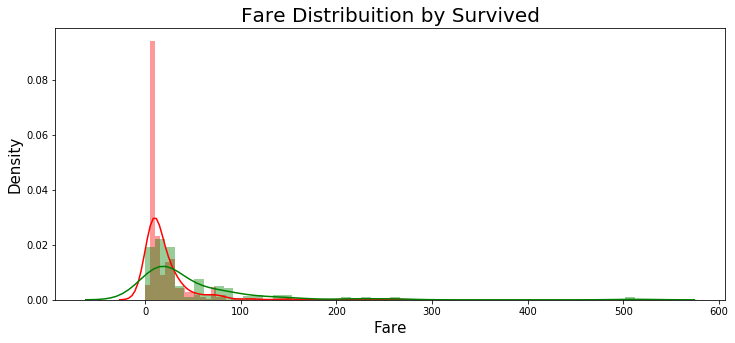

In [19]:
# Seting the figure size
plt.figure(figsize=(12,5))

# Understanding the Fare Distribuition 
sns.distplot(train_data[train_data.Survived == 0]["Fare"], 
             bins=50, color='r')
sns.distplot(train_data[train_data.Survived == 1]["Fare"], 
             bins=50, color='g')
plt.title("Fare Distribuition by Survived", fontsize=20)
plt.xlabel("Fare", fontsize=15)
plt.ylabel("Density",fontsize=15)
plt.show()

Survived    0    1
Fare_cat          
NoInf      14    1
quart_1   175   51
quart_2   155   62
quart_3   112   99
quart_4    93  129


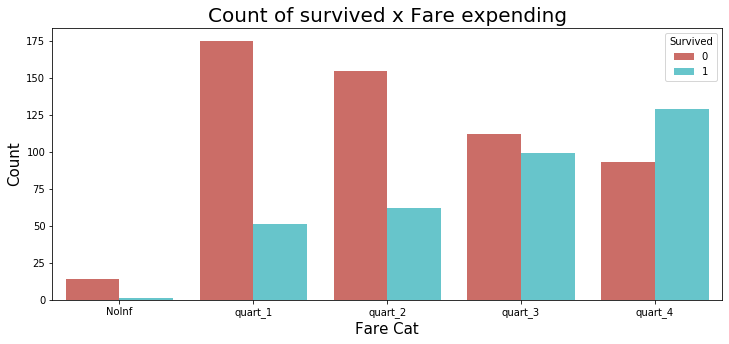

In [20]:
#Filling the NA's with -0.5
train_data.Fare = train_data.Fare.fillna(-0.5)

#intervals to categorize
quant = (-1, 0, 8, 15, 31, 600)

#Labels without input values
label_quants = ['NoInf', 'quart_1', 'quart_2', 'quart_3', 'quart_4']

#doing the cut in fare and puting in a new column
train_data["Fare_cat"] = pd.cut(train_data.Fare, quant, labels=label_quants)

#Description of transformation
print(pd.crosstab(train_data.Fare_cat, train_data.Survived))

plt.figure(figsize=(12,5))

#Plotting the new feature
sns.countplot(x="Fare_cat", hue="Survived", data=train_data, palette="hls")
plt.title("Count of survived x Fare expending",fontsize=20)
plt.xlabel("Fare Cat",fontsize=15)
plt.ylabel("Count",fontsize=15)

plt.show()

In [21]:
# Replicate the same to df_test
test_data.Fare = test_data.Fare.fillna(-0.5)

quant = (-1, 0, 8, 15, 31, 1000)
label_quants = ['NoInf', 'quart_1', 'quart_2', 'quart_3', 'quart_4']

test_data["Fare_cat"] = pd.cut(test_data.Fare, quant, labels=label_quants)

In [22]:
#Now lets drop the variable Fare, Age and ticket that is irrelevant now
del train_data["Fare"]
del train_data["Ticket"]
del train_data["Age"]
del train_data["Cabin"]
del train_data["Name"]

#same in df_test
del test_data["Fare"]
del test_data["Ticket"]
del test_data["Age"]
del test_data["Cabin"]
del test_data["Name"]

In [23]:
train_data.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,Title,Age_cat,Fare_cat
0,1,0,3,male,1,0,S,Mr,Student,quart_1
1,2,1,1,female,1,0,C,Mrs,Adult,quart_4
2,3,1,3,female,0,0,S,Miss,Young,quart_1
3,4,1,1,female,1,0,S,Mrs,Young,quart_4
4,5,0,3,male,0,0,S,Mr,Young,quart_2


Total of Survived or not: 
Survived
0    549
1    342
Name: PassengerId, dtype: int64


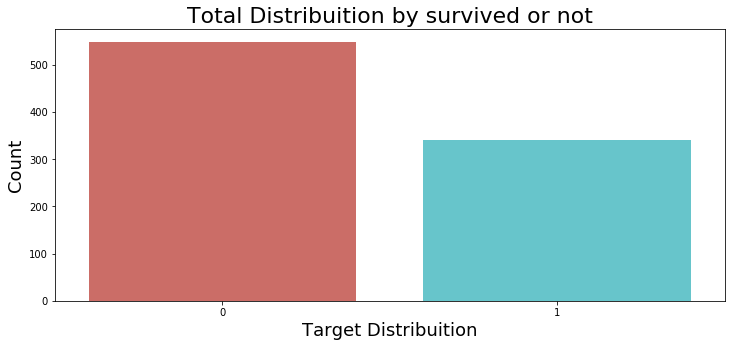

In [24]:
# Let see how many people die or survived
print("Total of Survived or not: ")
print(train_data.groupby("Survived")["PassengerId"].count())

plt.figure(figsize=(12,5))

sns.countplot(x="Survived", data=train_data,palette="hls")
plt.title('Total Distribuition by survived or not', fontsize=22)
plt.xlabel('Target Distribuition', fontsize=18)
plt.ylabel('Count', fontsize=18)

plt.show()

Sex       female  male
Survived              
0             81   468
1            233   109


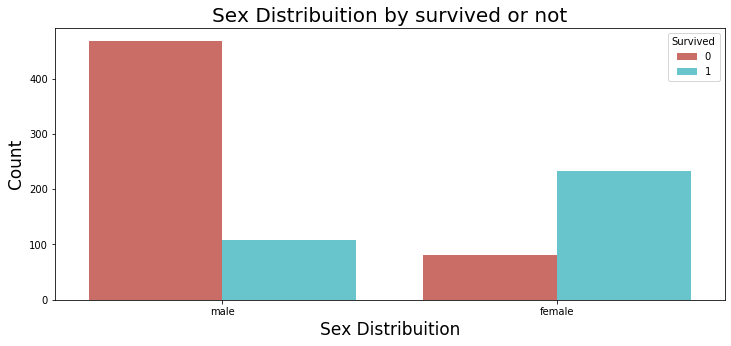

In [25]:
print(pd.crosstab(train_data.Survived, train_data.Sex))

plt.figure(figsize=(12,5))
sns.countplot(x="Sex", data=train_data, hue="Survived",palette="hls")
plt.title('Sex Distribuition by survived or not', fontsize=20)
plt.xlabel('Sex Distribuition',fontsize=17)
plt.ylabel('Count', fontsize=17)

plt.show();

In [26]:
#lets input the NA's with the highest frequency
train_data["Embarked"] = train_data["Embarked"].fillna('S')

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  219


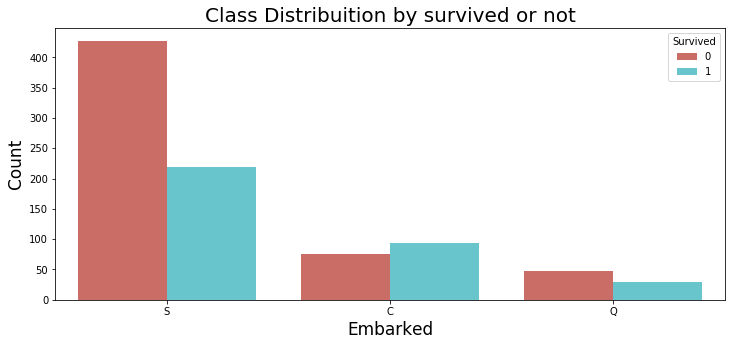

In [27]:
print(pd.crosstab(train_data.Survived, train_data.Embarked))

plt.figure(figsize=(12,5))

sns.countplot(x="Embarked", data=train_data, hue="Survived",palette="hls")
plt.title('Class Distribuition by survived or not',fontsize=20)
plt.xlabel('Embarked',fontsize=17)
plt.ylabel('Count', fontsize=17)

plt.show()

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119


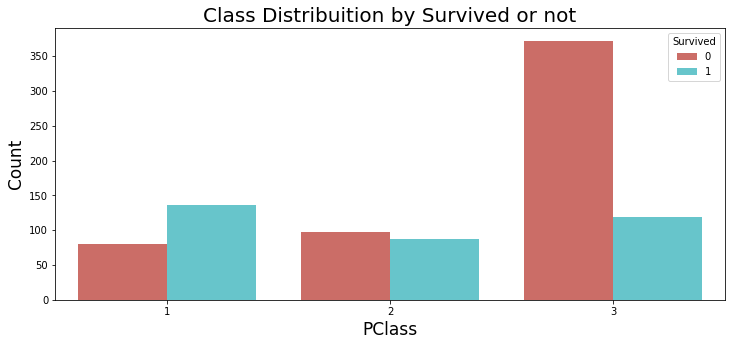

In [28]:
# Exploring Survivors vs Pclass
print(pd.crosstab(train_data.Survived, train_data.Pclass))

plt.figure(figsize=(12,5))

sns.countplot(x="Pclass", data=train_data, hue="Survived",palette="hls")
plt.xlabel('PClass',fontsize=17)
plt.ylabel('Count', fontsize=17)
plt.title('Class Distribuition by Survived or not', fontsize=20)

plt.show()

Looking the graphs, is clear that 3st class and Embarked at Southampton have a high probabilities to not survive

In [29]:
#Create a new column and sum the Parch + SibSp + 1 that refers the people self
train_data["FSize"] = train_data["Parch"] + train_data["SibSp"] + 1

test_data["FSize"] = test_data["Parch"] + test_data["SibSp"] + 1

Survived    0    1
FSize             
1         374  163
2          72   89
3          43   59
4           8   21
5          12    3
6          19    3
7           8    4
8           6    0
11          7    0


C:\Users\Dell-PC\Desktop\ML_Projects\heart-disease_prediction\env\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Dell-PC\Desktop\ML_Projects\heart-disease_prediction\env\lib\site-packages\seaborn\categorical.py:3675: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


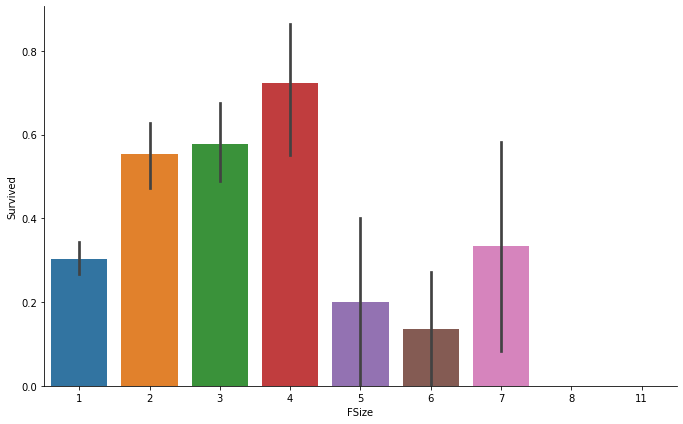

In [30]:
print(pd.crosstab(train_data.FSize, train_data.Survived))
sns.factorplot(x="FSize",y="Survived", data=train_data, kind="bar",size=6, aspect=1.6)
plt.show()

In [31]:
del train_data["SibSp"]
del train_data["Parch"]

del test_data["SibSp"]
del test_data["Parch"]

## Data Preprocessing

In [32]:
train_data.head()

,PassengerId,Survived,Pclass,Sex,Embarked,Title,Age_cat,Fare_cat,FSize
0,1,0,3,male,S,Mr,Student,quart_1,2
1,2,1,1,female,C,Mrs,Adult,quart_4,2
2,3,1,3,female,S,Miss,Young,quart_1,1
3,4,1,1,female,S,Mrs,Young,quart_4,2
4,5,0,3,male,S,Mr,Young,quart_2,1


In [33]:
train_data = pd.get_dummies(train_data , columns=["Sex","Embarked","Age_cat","Fare_cat","Title"],\
                          prefix=["Sex","Emb","Age","Fare","Prefix"], drop_first=True)

test_data = pd.get_dummies(test_data, columns=["Sex","Embarked","Age_cat","Fare_cat","Title"],\
                         prefix=["Sex","Emb","Age","Fare","Prefix"], drop_first=True)

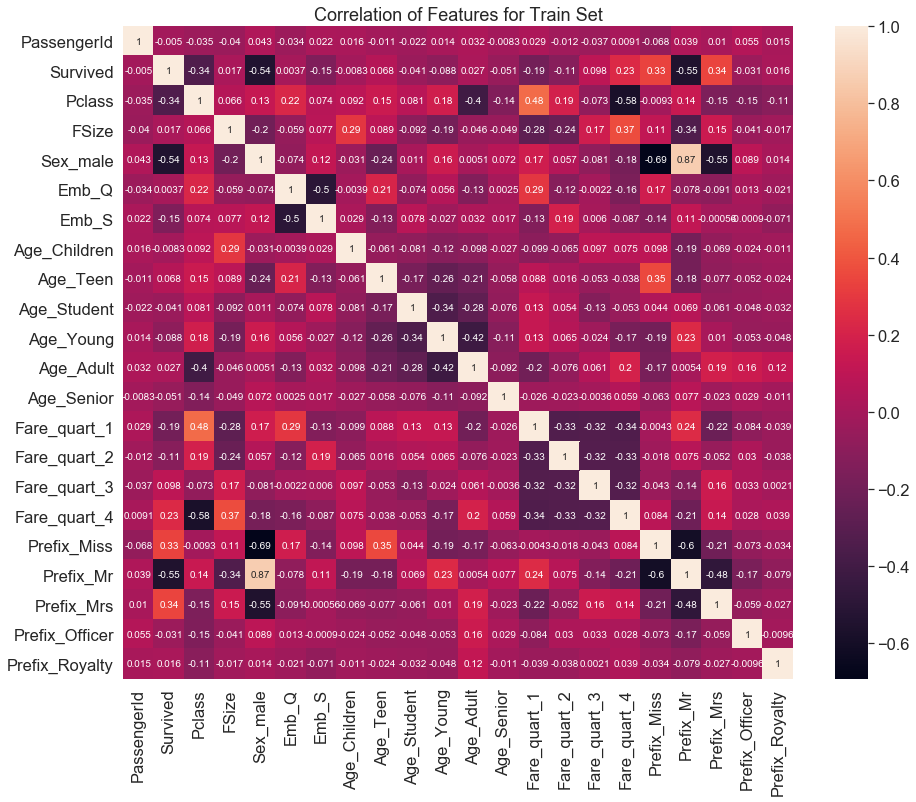

In [69]:
#Finallt, lets look the correlation of df_train
plt.figure(figsize=(15,12))
plt.title('Correlation of Features for Train Set')
sns.heatmap(train_data.astype(float).corr(),vmax=1.0,  annot=True)
plt.show()

In [70]:
X= train_data.drop(["Survived","PassengerId"],axis=1)
y= train_data["Survived"]

test = test_data.drop(["PassengerId"],axis=1)

## Creating a Model

In [71]:
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

model = RandomForestClassifier()

model.fit(X_train, y_train)
preds = model.predict(X_test)

In [72]:
# to improve the model 
print(confusion_matrix(y_test,preds))


[[92 13]
 [17 57]]


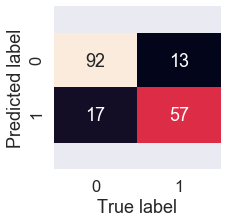

In [73]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    
plot_conf_mat(y_test, preds)

In [74]:
model.score(X_test, y_test)

0.8324022346368715

## Hyperparamter Tuning with GridSearchCV

In [75]:
parameters = {
    'n_estimators'      : [320,330,340],
    'max_depth'         : [8, 9, 10, 11, 12],
    'random_state'      : [0],
    #'max_features': ['auto'],
    #'criterion' :['gini']
}

In [76]:
clf = GridSearchCV(RandomForestClassifier(), parameters, cv=10, n_jobs=-1)
clf.fit(X_train, y_train)

print(clf.score(X_train, y_train))
print(clf.best_params_)

0.8792134831460674
{'max_depth': 8, 'n_estimators': 320, 'random_state': 0}


In [77]:
predictions = clf.predict(test)
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('my_submission.csv', index = False)